# Preliminaries

Documentation and installation instructions for igraph's Python interface are available at https://python.igraph.org/. Make sure you install the latest version.

If you run into problems, ask on our Piazza forum.

## Setup

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

In [102]:
import igraph
igraph.__version__

'0.11.3'

In [103]:
from igraph import Graph, plot

Evaluate the following cell to have graphs displayed automatically in notebooks:

In [104]:
# Helper function for auto-display of graphs in Jupyter notebooks

import random

def format_igraph(g : igraph.Graph):

    if g.vcount() > 100 or g.ecount() > 500:
        print(repr(g))
        return

    plt.axis('equal')
    if 'label' in g.vs.attribute_names():
        labels = g.vs['label']
    elif 'name' in g.vs.attribute_names():
        labels = g.vs['name']
    else:
        labels = range(g.vcount())
    rng_state = random.getstate()
    random.seed(42)
    if g.is_tree() and g.vcount() <= 50 and g.diameter() <= 10:
        layout = g.layout_reingold_tilford()
        layout.mirror(1) # plot from top to bottom
    else:
        layout = g.layout_fruchterman_reingold()
    random.setstate(rng_state)
    igraph.plot(g, backend="matplotlib", vertex_label=labels, layout=layout)

# Register formatters
get_ipython().display_formatter.ipython_display_formatter.for_type(igraph.Graph, format_igraph);

## Creating graphs and computing basic properties

In python-igraph, vertices are indexed from `0` to `n-1` where $n$ is the vertex count. A simple way to create a new graph is to specify its edges:

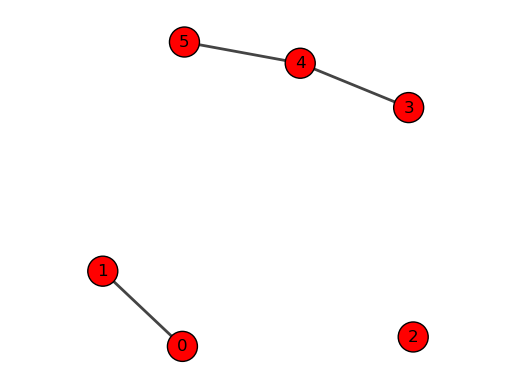

In [105]:
Graph([(0,1), (3,4), (4,5)])

Note that the existence of vertex `2` was implied by using indices larger than 2. We can also specify the vertex count manually:

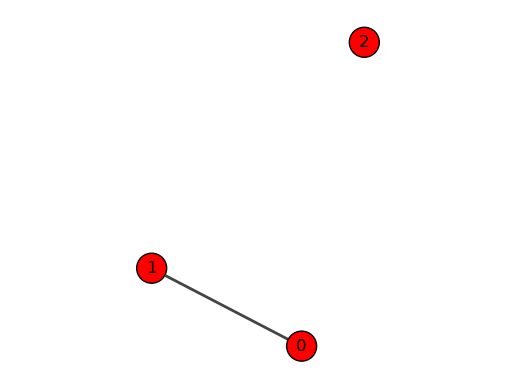

In [106]:
Graph([(0,1)], n=3)

A very convenient way to create graphs is to use the "formula notation":

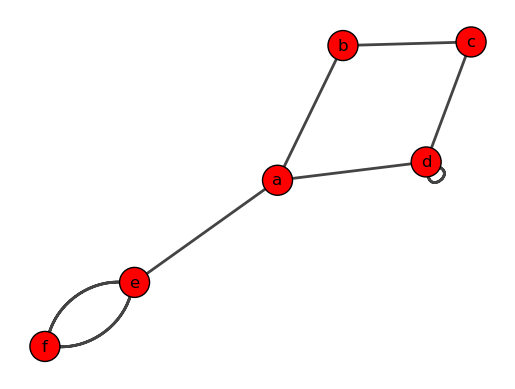

In [107]:
g = Graph.Formula('a-b-c-d-a-e-f-e, d-d', simplify=False)
g

Now vertices have names which are strings. These were displayed in the plot above.

In [108]:
g.vs['name']

['a', 'b', 'c', 'd', 'e', 'f']

We can now refer to vertices by name when manipulating the graph:

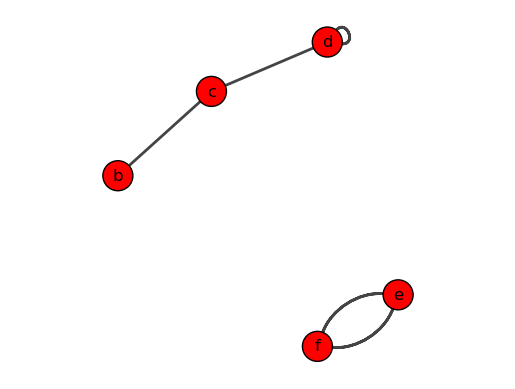

In [109]:
g.delete_vertices(['a'])
g

igraph has many functions to create graphs. A few are illustrated below.

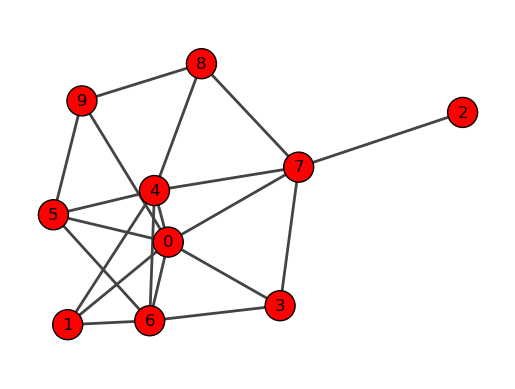

In [110]:
# Random graph with n vertices and m edges
Graph.Erdos_Renyi(n=10,m=20)

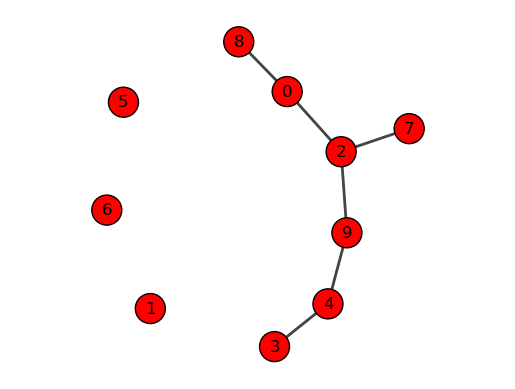

In [111]:
# Random graph with n vertices, and each vertex pair being connected with probability p
g = Graph.Erdos_Renyi(n=10, p=0.15)
g

In [112]:
g.is_connected()

False

In [113]:
list(g.connected_components())

[[0, 2, 3, 4, 7, 8, 9], [1], [5], [6]]

In [114]:
g.girth()

inf

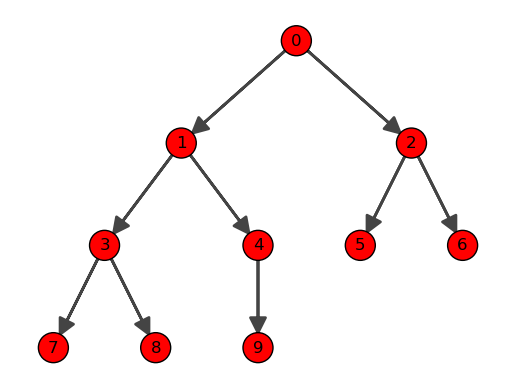

In [115]:
Graph.Tree(10, 2, mode = 'out')

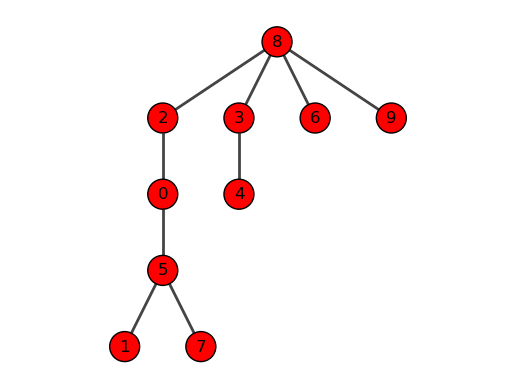

In [116]:
g = Graph.Tree_Game(10)
g

In [117]:
g.is_tree()

True

In [118]:
g.diameter()

6

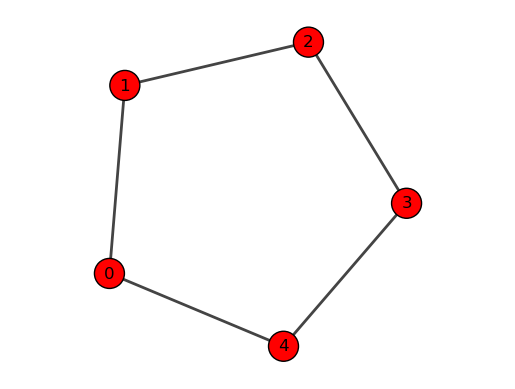

In [119]:
# C_5
Graph.Ring(5)

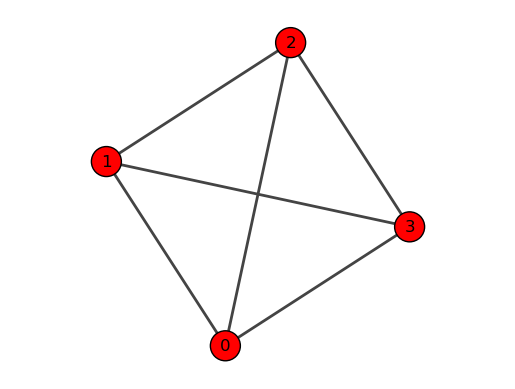

In [120]:
# K_4
Graph.Full(4)

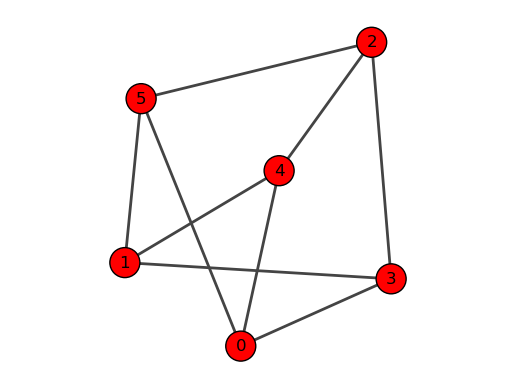

In [121]:
# K_{3,3}
g = Graph.Full_Bipartite(3,3)
g

In [122]:
g.is_bipartite()

True

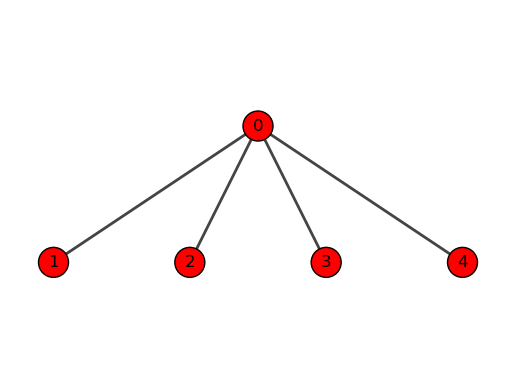

In [123]:
# S_5 = K_{1,4}
Graph.Star(5)

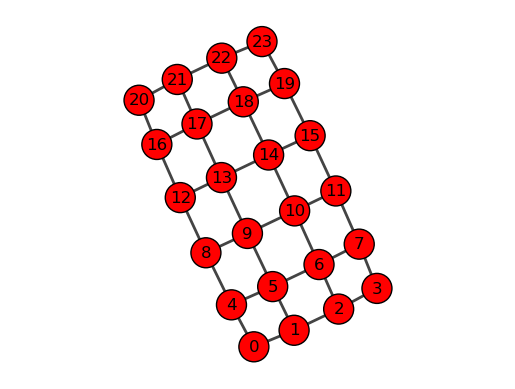

In [124]:
Graph.Lattice([4,6], circular=False)

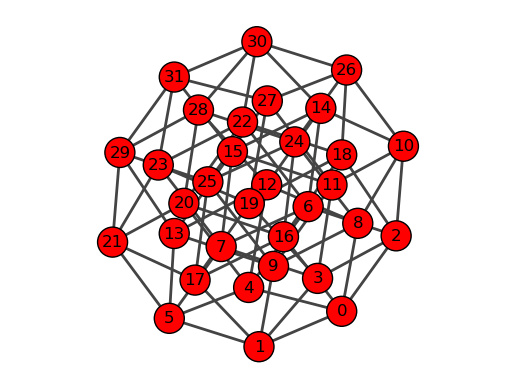

In [125]:
# 5-hypercube
Graph.Lattice([2,2,2,2,2], circular=False)